# Homework 2

For this assignment, you will be developing an artificial neural network to classify data given in the __[Dry Beans Data Set](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#)__. This data set was obtained as a part of a research study by Selcuk University, Turkey, in which a computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features. More details on the study can be found in the following __[research paper](https://www.sciencedirect.com/science/article/pii/S0168169919311573)__.

## About the Data Set For Q1-2
Seven different types of dry beans were used in a study in Selcuk University, Turkey, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features - 12 dimensions and 4 shape forms - were obtained from the grains.

Number of Instances (records in the data set): __13611__

Number of Attributes (fields within each record, including the class): __17__

### Data Set Attribute Information:

1. __Area (A)__ : The area of a bean zone and the number of pixels within its boundaries.
2. __Perimeter (P)__ : Bean circumference is defined as the length of its border.
3. __Major axis length (L)__ : The distance between the ends of the longest line that can be drawn from a bean.
4. __Minor axis length (l)__ : The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. __Aspect ratio (K)__ : Defines the relationship between L and l.
6. __Eccentricity (Ec)__ : Eccentricity of the ellipse having the same moments as the region.
7. __Convex area (C)__ : Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. __Equivalent diameter (Ed)__ : The diameter of a circle having the same area as a bean seed area.
9. __Extent (Ex)__ : The ratio of the pixels in the bounding box to the bean area.
10. __Solidity (S)__ : Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. __Roundness (R)__ : Calculated with the following formula: (4piA)/(P^2)
12. __Compactness (CO)__ : Measures the roundness of an object: Ed/L
13. __ShapeFactor1 (SF1)__
14. __ShapeFactor2 (SF2)__
15. __ShapeFactor3 (SF3)__
16. __ShapeFactor4 (SF4)__

17. __Classes : *Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira*__

### Libraries that can be used :
- NumPy, SciPy, Pandas, Sci-Kit Learn, TensorFlow, Keras
- Any other library used during the lectures and discussion sessions.

## About the Data Set For Q3
In this problem, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.


### Other Notes
- Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of this assignment.
- Discussion materials should be helpful for doing the assignments.
- The homework submission should be a .ipynb file.



## Exercise 1 : Building a Feed-Forward Neural Network(50 points in total)

### Exercise 1.1 : Data Preprocessing (10 points)

- As the classes are categorical, use one-hot encoding to represent the set of classes. You will find this useful when developing the output layer of the neural network.
- Normalize each field of the input data using the min-max normalization technique.

### Exercise 1.2 : Training and Testing the Neural Network (40 points)

Design a 4-layer artificial neural network, specifically a feed-forward multi-layer perceptron (using the sigmoid activation function), to classify the type of 'Dry Bean' given the other attributes in the data set, similar to the one mentioned in the paper above. Please note that this is a multi-class classification problem so select the right number of nodes accordingly for the output layer.

For training and testing the model, split the data into training and testing set by __90:10__ and use the training set for training the model and the test set to evaluate the model performance.

Consider the following hyperparameters while developing your model :

- Number of nodes in each hidden layer should be (12, 3)
- Learning rate should be 0.3
- Number of epochs should be 500
- The sigmoid function should be used as the activation function in each layer
- Stochastic Gradient Descent should be used to minimize the error rate

__Requirements once the model has been trained :__

- A confusion matrix for all classes, specifying the true positive, true negative, false positive, and false negative cases for each category in the class
- The accuracy and mean squared error (MSE) of the model
- The precision and recall for each label in the class

__Notes :__

- Splitting of the dataset should be done __after__ the data preprocessing step.
- The mean squared error (MSE) values obtained __should be positive__.


In [36]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [37]:
#1.1 -> use one hot encoding to numerically represnet diff classes
#the values are normalized in this format
SEKER = [1,0,0,0,0,0,0]
BARBUNYA = [0,1,0,0,0,0,0]
BOMBAY = [0,0,1,0,0,0,0]
CALI = [0,0,0,1,0,0,0]
DERMOSAN = [0,0,0,0,1,0,0]
HOROZ = [0,0,0,0,0,1,0]
SIRA = [0,0,0,0,0,0,1]

#1.2
dataset = pd.read_csv("Dry_Beans_Dataset.csv")

'''
print("Dataset :")
print(dataset.head())
print("Class: ")
print(dataset['Class'].unique())

print("\nDimensions of the dataset : ", dataset.shape)
print("\nFeatures of the dataset :")
print(dataset.describe(include = 'all'))
'''



'\nprint("Dataset :")\nprint(dataset.head())\nprint("Class: ")\nprint(dataset[\'Class\'].unique())\n\nprint("\nDimensions of the dataset : ", dataset.shape)\nprint("\nFeatures of the dataset :")\nprint(dataset.describe(include = \'all\'))\n'

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score ,r2_score

X = dataset.drop('Class', axis = 1)
y = dataset['Class']

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'Class': set_of_classes})
y = pd.get_dummies(y)
y = y.astype(int)

print("Pre-processed data :\n",X)
print("Pre-processed class :\n",y)


data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.1)
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

mlp.fit(data_train,class_train)
pred = mlp.predict(data_test)

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print(pred[:5])
print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))


Pre-processed data :
            Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      0.104229   0.198694         0.246967         0.165518      0.549934   
1      0.055748   0.114396         0.135499         0.126473      0.385468   
2      0.028340   0.055731         0.078990         0.086908      0.336523   
3      0.124097   0.218773         0.257541         0.213740      0.464403   
4      0.008715   0.013589         0.016569         0.077079      0.194315   
...         ...        ...              ...              ...           ...   
13606  0.083417   0.150914         0.162566         0.189677      0.315266   
13607  0.646868   0.733202         0.747292         0.728031      0.426928   
13608  0.118900   0.200327         0.218063         0.236224      0.342497   
13609  0.097606   0.217940         0.274969         0.124833      0.723842   
13610  0.112880   0.194735         0.214304         0.223307      0.358612   

       Eccentricity  ConvexArea  EquivDia

/home/tajmoney/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Exercise 2 : k-fold Cross Validation (10 points in total)

In order to avoid using biased models, use 10-fold cross validation to generalize the model based on the given data set.

__Requirements :__
- The accuracy and MSE values during each iteration of the cross validation
- The overall average accuracy and MSE value

__Note :__ The mean squared error (MSE) values obtained should be positive.

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
regmodel = reg.fit(data_train,class_train)

print('Coefficients: \n', regmodel.coef_)
reg_predictions=reg.predict(data_test)

# The mean squared error
print('\nMean squared error: %.2f' % mean_squared_error(class_test, reg_predictions))
# The coefficient of determination: 1 is perfect prediction
print('\nCoefficient of determination: %.2f' % r2_score(class_test, reg_predictions))

print('\nEvaluation Scores: ')
# Array of scores of the estimator for each run of the cross validation.
# cv: Determines the cross-validation splitting strategy
scores = cross_val_score(LinearRegression(), X, y, cv=10, scoring='r2')
print(scores)

# report performance
print('Mean R2: %.3f' % (np.mean(np.abs(scores))))

Coefficients: 
 [[-6.72765542e+01  1.15588058e+01 -5.91667557e+01 -6.46687735e+01
   1.34331746e+01 -6.80551814e-01  5.79389980e+01  1.19278022e+02
   3.89213910e-02  7.38889256e-01  2.48669285e-01  3.83726557e+01
   5.44912577e+00 -3.57207663e+00 -1.84627256e+01 -2.05532305e+00]
 [ 1.09041254e+01 -1.72192429e+00 -3.63002350e+00  1.40244992e+00
   1.70453387e+00  2.65918054e-01 -5.39395541e+00 -3.08743352e-01
  -1.46467398e-02 -1.10612778e-01 -1.53578775e-01  1.19571340e+00
  -4.33596612e-01  4.14284729e-01 -1.04682788e+00 -7.10548660e-02]
 [-1.77479863e+01 -1.49725093e+01  3.33819230e+01  2.41478264e+01
  -1.43221943e+01 -1.18893354e+00 -6.51831399e+00 -1.11061949e+01
   1.10300158e-01 -2.85747690e-01 -1.68752607e+00 -2.15242421e+01
   4.00396927e+00  5.43674912e+00  6.02497356e+00  1.24964867e+00]
 [ 5.72108766e+01  1.37556350e+01  9.85833505e+01  9.41784786e+01
   6.35146180e+00 -8.29728077e+00 -6.81458296e+01 -1.80625057e+02
  -1.94726402e-02 -1.62639663e+00  2.98137401e+00  1.1373

## Exercise 3 - Logistic Regression (20 points in total)
Recall the dataset from last week homework

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >

In [40]:
cardata = pd.read_csv("auto-mpg.csv")
filtered = cardata[cardata['origin'].isin(['USA','Japan'])]

### Exercise 3.2 - Logistic Regression (15 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br >
Then, **if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.** (Hint: Exercise 1)

Requirements
 - Report the testing precision and recall for both regions.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

X = filtered[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = filtered['origin']

y = y.map({'USA': 1, 'Japan': 0})

Car_data_train, Car_data_test, Car_class_train, Car_class_test = train_test_split(X, y, test_size=0.2)

# Build a logistic regression model
logreg = LogisticRegression()
logreg.fit(Car_data_train, Car_class_train)

# Predict the class labels for the testing set
Car_class_pred = logreg.predict(Car_data_test)

precision_usa = precision_score(Car_class_test[Car_class_test == 1], Car_class_pred[Car_class_test == 1])
recall_usa = recall_score(Car_class_test[Car_class_test == 1], Car_class_pred[Car_class_test == 1])
precision_japan = precision_score(Car_class_test[Car_class_test == 0], Car_class_pred[Car_class_test == 0])
recall_japan = recall_score(Car_class_test[Car_class_test == 0], Car_class_pred[Car_class_test == 0])

# Print the precision and recall scores for both USA and Japan
print('USA precision: {:.2f}, recall: {:.2f}'.format(precision_usa, recall_usa))
print('Japan precision: {:.2f}, recall: {:.2f}'.format(precision_japan, recall_japan))

USA precision: 1.00, recall: 0.87
Japan precision: 0.00, recall: 0.00


/home/tajmoney/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Exercise 4 - Polynomial Regressor using Gradient Descent (20 points in total)
Now we are going to look into model fitting. In the dataset cost.csv, the first column is the independent variable cost, and the second column is the dependent variable production_output.

### Exercise 4.1 - Split the dataset (5 points)
Import the dataset cost.csv and split them into training and testing set with ratio 70:30.

In [42]:
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('cost.csv')

#grabs data given the column name 
X = dataset[['production_output']] 
y = dataset['cost']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state = 42)
percentX = len(X_train)/len(X) * 100
percentY = len(y_train)/len(y) * 100


print("X train now holds ",len(X_train), "out of the ",len(X),"rows; which is",percentX,"%")
print("y train now holds ",len(y_train), "out of the ",len(y),"rows; which is",percentY,"%")

X train now holds  105 out of the  150 rows; which is 70.0 %
y train now holds  105 out of the  150 rows; which is 70.0 %


### Exercise 4.2 - Polynomial Regression (15 points)
Compute the RMSE and R2 for the training and testing set. Using polynomial regression with degree 1, 2, 3, and 4, which model provides the most appropriate prediction? Justify your answer and plot the models fitted line.


Degree 1 Polynomial Regression
Training RMSE: 438.842779774984479
Training R2: 0.607278651875719
Test RMSE: 281.084793492857273
Test R2: 0.529908615075548


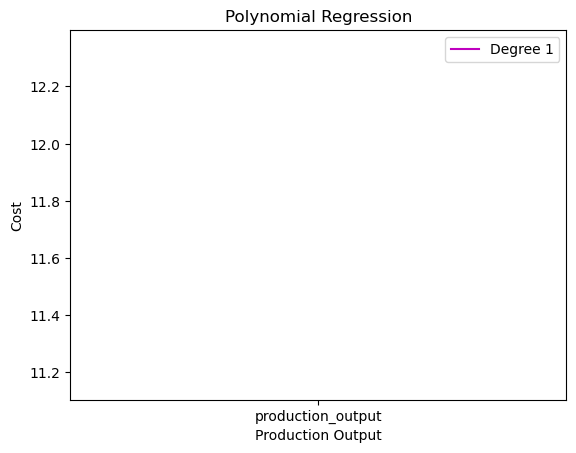


Degree 2 Polynomial Regression
Training RMSE: 181.973847089905803
Training R2: 0.932471897213021
Test RMSE: 115.351446278822337
Test R2: 0.920831270032224


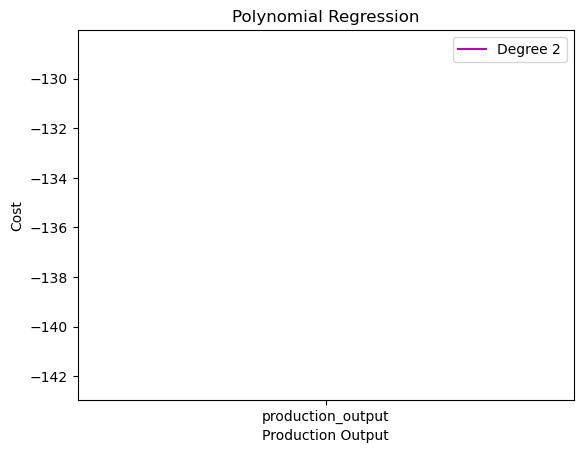


Degree 3 Polynomial Regression
Training RMSE: 39.467718213921941
Training R2: 0.996823487030548
Test RMSE: 26.623866930509195
Test R2: 0.995782550823147


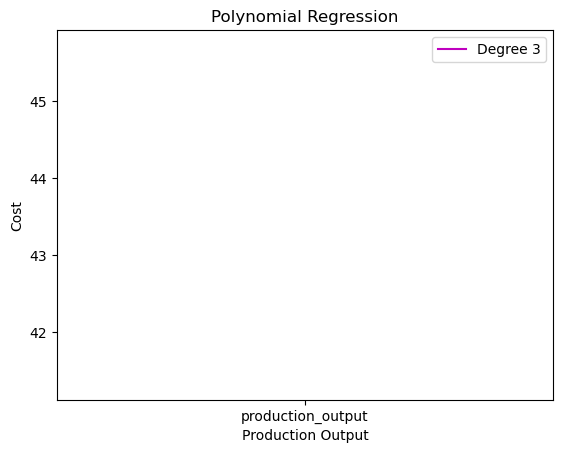


Degree 4 Polynomial Regression
Training RMSE: 5.995418378537954
Training R2: 0.999926699728208
Test RMSE: 5.998610509991108
Test R2: 0.999785903820228


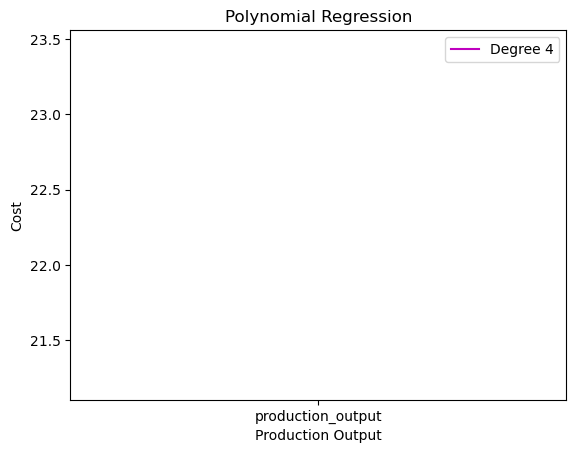

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator


def poly_reg(degreeNumber):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state = 42)

    polyFeatures = PolynomialFeatures(degree=degreeNumber)
    x_poly = polyFeatures.fit_transform(X_train)

    model = LinearRegression()
    model.fit(x_poly, y_train)

    y_train_pred = model.predict(x_poly)
    y_test_pred = model.predict(polyFeatures.fit_transform(X_test))

    #calculate rmse for the training sets
    rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2 = r2_score(y_train, y_train_pred)
    #for the test sets
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    #print out results
    print('\nDegree %d Polynomial Regression' % degreeNumber)
    print('Training RMSE: %8.15f' % rmse)
    print('Training R2: %8.15f' % r2)
    print('Test RMSE: %8.15f' % rmse_test)
    print('Test R2: %8.15f' % r2_test)

    #plot training data and regression line
    plt.scatter(X_train, y_train, s=10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_train,y_train_pred), key=sort_axis)
    X_train, y_train_pred = zip(*sorted_zip)
    plt.plot(X_train, y_train_pred, color='m', label='Degree %d' % degreeNumber)
    plt.xlabel('Production Output')
    plt.ylabel('Cost')
    plt.title('Polynomial Regression')
    plt.legend()
    plt.show()

for i in range(1,5):
    poly_reg(i)